In [1]:
import cupy as cp
from cupy_ivp import DOP853

In [2]:
n = 500
x = cp.linspace(-10,10,n)
d2 = -2 * cp.eye(n) + cp.diag(cp.ones(n-1), k=-1) + cp.diag(cp.ones(n-1), k=+1)
d2 /= (x[1] - x[0])**2

y0 = cp.exp(-1.0 * (x+5.0)**2) * cp.exp(5.0j*x)

In [3]:
def fun(t, y):
    return -1.0j * -0.5 * cp.dot(d2, y)

In [4]:
prop = DOP853(fun, t0=0.0, y0=y0, t_bound=5.0, rtol=1e-5, atol=1e-8)

y_log = []
i = 0
while not prop.status == "finished":
    if i % 100 == 0:
        y_log.append(cp.copy(prop.y))
        
    prop.step()
    i += 1
    


In [5]:
len(y_log)

11

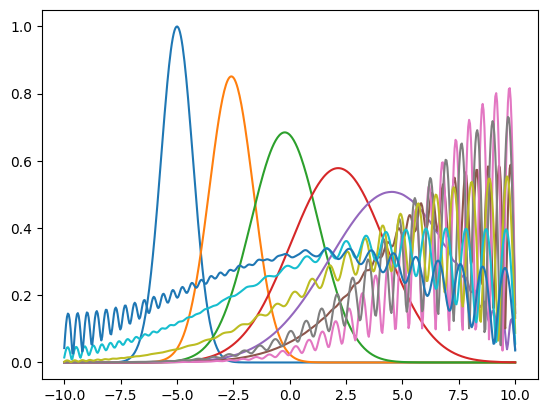

In [6]:
import matplotlib.pyplot as plt

plt.figure()
for y in y_log:
    plt.plot(x.get(), cp.abs(y).get())
plt.show()